In [1]:
from scipy.fft import fft, ifft, fftshift
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hatFunction(x):
    if x < 0.25:
        return 0.0
    elif 0.25 <= x < 0.5:
        return 2*(x-0.25)
    elif 0.5 <= x < 0.75:
        return 0.5 - 2*(x-0.5)
    elif x >= 0.75:
        return 0.0

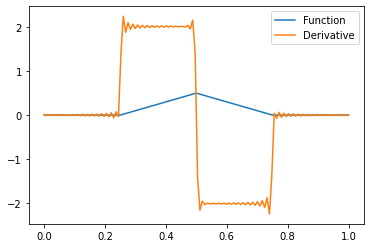

In [3]:
n = 128
x = np.linspace(0,1,n)

hatFunction_vec = np.vectorize(hatFunction)

x = hatFunction_vec(x)

# Derivative using FFT (spectral derivative)
fhat = fft(x);
kappa = (2*np.pi) * np.arange(-n/2, n/2);
kappa = fftshift(kappa);        #Re-order fft frequencies
dfhat = 1j * kappa *fhat;
dfFFT = np.real(ifft(dfhat));

t = np.linspace(0,1,n)
plt.plot(t,x,label='Function')
plt.plot(t,dfFFT,label='Derivative')
plt.legend()